FFR 120  
Felix Waldschock

HW 3 
Exercise 12.3
## The Albert-Barabasi preferential-growth model

In [291]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science','grid'])
from tqdm import trange



In [292]:
# parameters
m = 3
n0 = 5
n = 100


In [293]:
# generate adjacency matrix
def generateAdjacencyMatrix(n):
    A = np.ones((n,n))
    # diagonal = 0 
    np.fill_diagonal(A, 0)
    return A

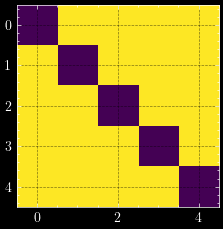

In [294]:
A = generateAdjacencyMatrix(n0)
plt.imshow(A)

In [295]:
def getDegree(A):
    # get the sum over one axis, e.g the columns
    return np.sum(A,axis=0)

In [296]:
def plot_ErdosRenyi(A):
    n = A.shape[0]
    dAngle = 2*np.pi/n
    r = 1
    x = r*np.cos(np.linspace(0,2*np.pi,n))
    y = r*np.sin(np.linspace(0,2*np.pi,n))
    plt.figure(figsize=(6,6))
    plt.axis('off')
    plt.plot(x,y,'o',color='blue')
    for i in range(n):
        for j in range(n):
            if A[i,j] == 1:
                plt.plot([x[i],x[j]],[y[i],y[j]],color='red')
    plt.show()

In [297]:
def rouletteWheelSelection(Vector):
    # make a cumsum of the vector
    cumsum = np.cumsum(Vector)
    # normalize the cumsum
    cumsum = cumsum / np.sum(Vector)

    # generate a random number between 0 and 1
    r = np.random.rand()

    # find the index of the cumsum using searchsorted
    index = np.searchsorted(cumsum, r)
    return index

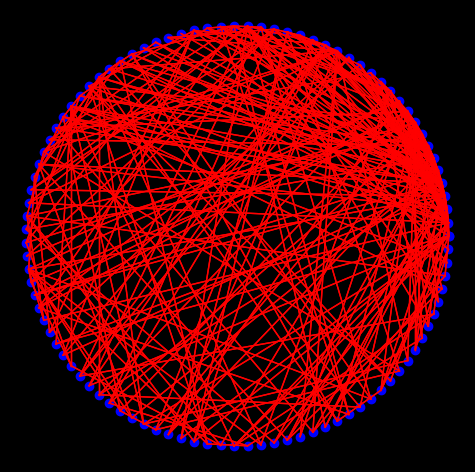

In [298]:
# loop over (n-n0)
for i in range(n-n0):
    # get degree
    degree = getDegree(A)

    # add a new node to A, pad with zeros
    A = np.pad(A, ((0,1),(0,1)), 'constant', constant_values=0)

    # add the new node to m extant nodes choosem randomly using a probability that is proportional to their degree
    for j in range(m):
        # get the probability
        degree = getDegree(A)
        indx = rouletteWheelSelection(degree)
        
        # add the edge
        A[indx,-1] = 1
        A[-1,indx] = 1


plot_ErdosRenyi(A)


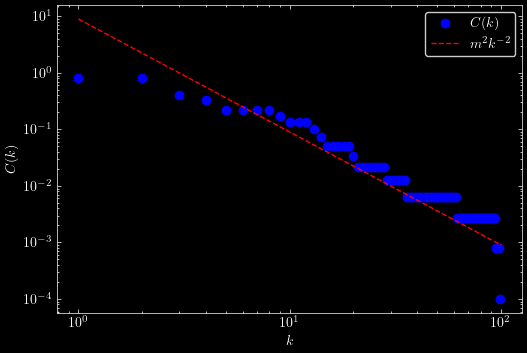

In [299]:
# plot the degree distribution
Ds = getDegree(A)
# sort Ds in descending order
Ds = np.sort(Ds)[::-1] 

plt.figure(figsize=(6,4))
plt.loglog((Ds**(3))/10000,'o',color='blue')
plt.xlabel('$k$')
plt.ylabel('$C(k)$')

# plot the trend line described by m**2 * k**(-2)
x = np.linspace(1,len(Ds),len(Ds))
y = m**2 * x**(-2)
plt.loglog(x,y,'--',color='red')
plt.legend(['$C(k)$','$m^2k^{-2}$'])
plt.show()

